In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv("twitter_sentiment.csv")

In [2]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.drop(['2401','Borderlands'],axis=1,inplace=True)
df.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [4]:
df.columns=['Sentiment','text']
df.head()

,Sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [5]:
df

,Sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
75676,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75677,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75678,Positive,Today sucked so it’s time to drink wine n play...
75679,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  75681 non-null  object
 1   text       74995 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
# checking for null values
df.isnull().sum()

Sentiment      0
text         686
dtype: int64

In [8]:
df.sample(10)

,Sentiment,text
4241,Positive,Soooo Cold War beta tonight on xbox . I enjoy...
22016,Neutral,I dont trust aimbot. Aimbot uses me..
7935,Positive,appreciate you to my man!
15988,Positive,Lol How accurate
62606,Negative,"Guys, am here to tell you the RUMOUR of Grand ..."
39036,Irrelevant,I am very happy to represent @ FCBeSports with...
4588,Negative,where everybody takes in the damn bushes from ...
14309,Negative,@DOTA2 quarantine got all dota players fucked ...
48296,Negative,Smh –
1489,Neutral,"So I can't play in the border areas, I'm sorry..."


In [9]:
# lets drop the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74995 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  74995 non-null  object
 1   text       74995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [10]:
# lets check the text which have length>=5
print(sum(df['text'].apply(len)>5))
print(sum(df['text'].apply(len)<=5))

72882
2113


In [11]:
df=df[df['text'].apply(len)>5]
df.shape

(72882, 2)

In [12]:
import preprocess_kgptalkie as ps

In [13]:
import warnings
warnings.filterwarnings('ignore')
df=ps.get_basic_features(df)
df.columns

Index(['Sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [14]:
df.head()

,Sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
1,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
2,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
3,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
4,Positive,im getting into borderlands and i can murder y...,44,10,4.400000,5,0,0,1,0


In [15]:
# lets do some plotting of graphs
import matplotlib.pyplot as plt
import seaborn as sns

num_cols=df.select_dtypes(include='number')
num_cols

,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,40,12,3.333333,6,0,0,1,2
1,41,10,4.100000,5,0,0,1,0
2,42,10,4.200000,5,0,0,1,0
3,46,12,3.833333,6,0,0,2,0
4,44,10,4.400000,5,0,0,1,0
...,...,...,...,...,...,...,...,...
75676,235,47,5.000000,20,0,0,6,1
75677,202,46,4.391304,15,0,0,4,10
75678,97,24,4.041667,9,0,0,1,1
75679,42,8,5.250000,2,0,0,2,0


<Axes: ylabel='Sentiment'>

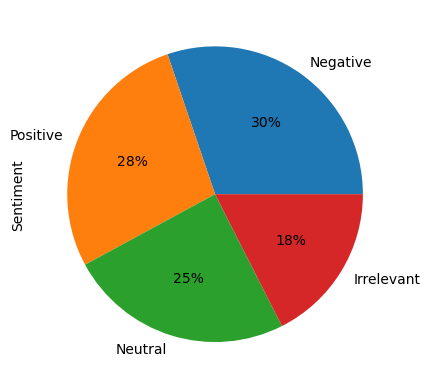

In [16]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

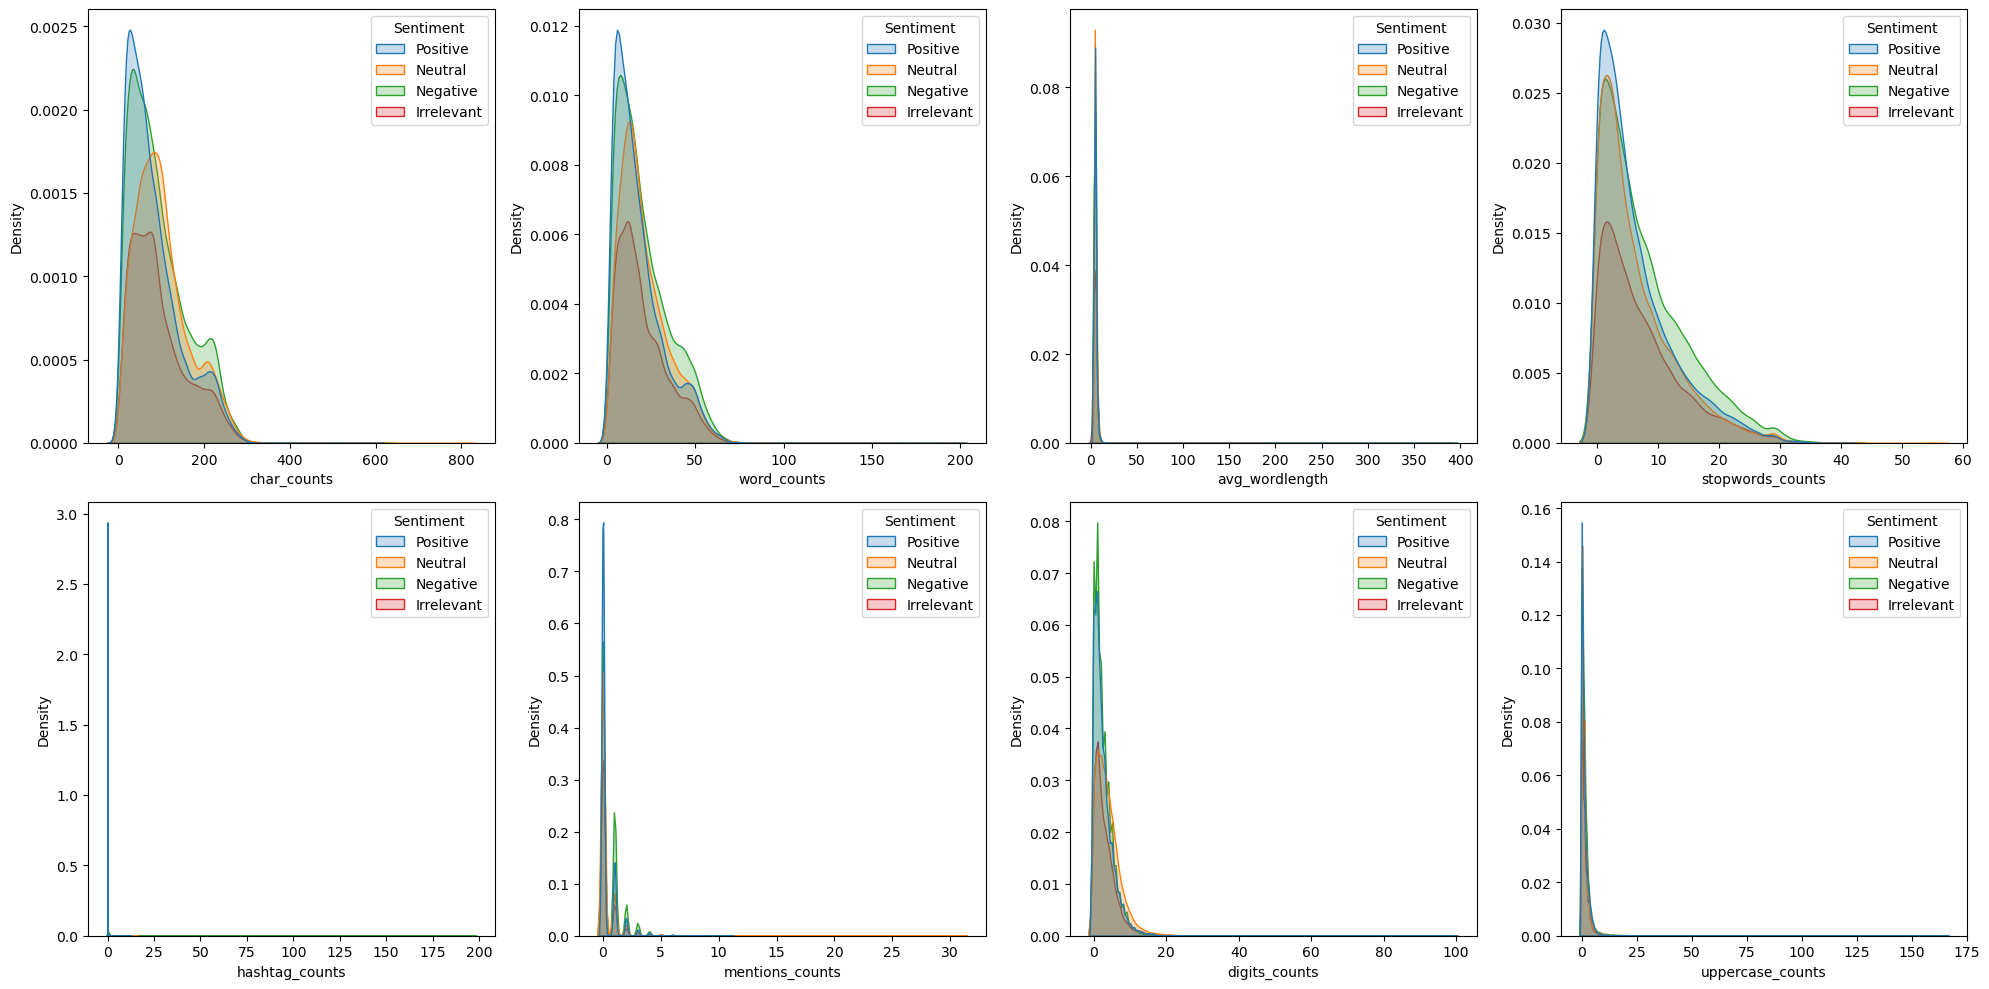

In [17]:
plt.figure(figsize=(20,10))
for index,col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue='Sentiment', fill=True)
    
plt.tight_layout()
plt.show()

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
#     sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

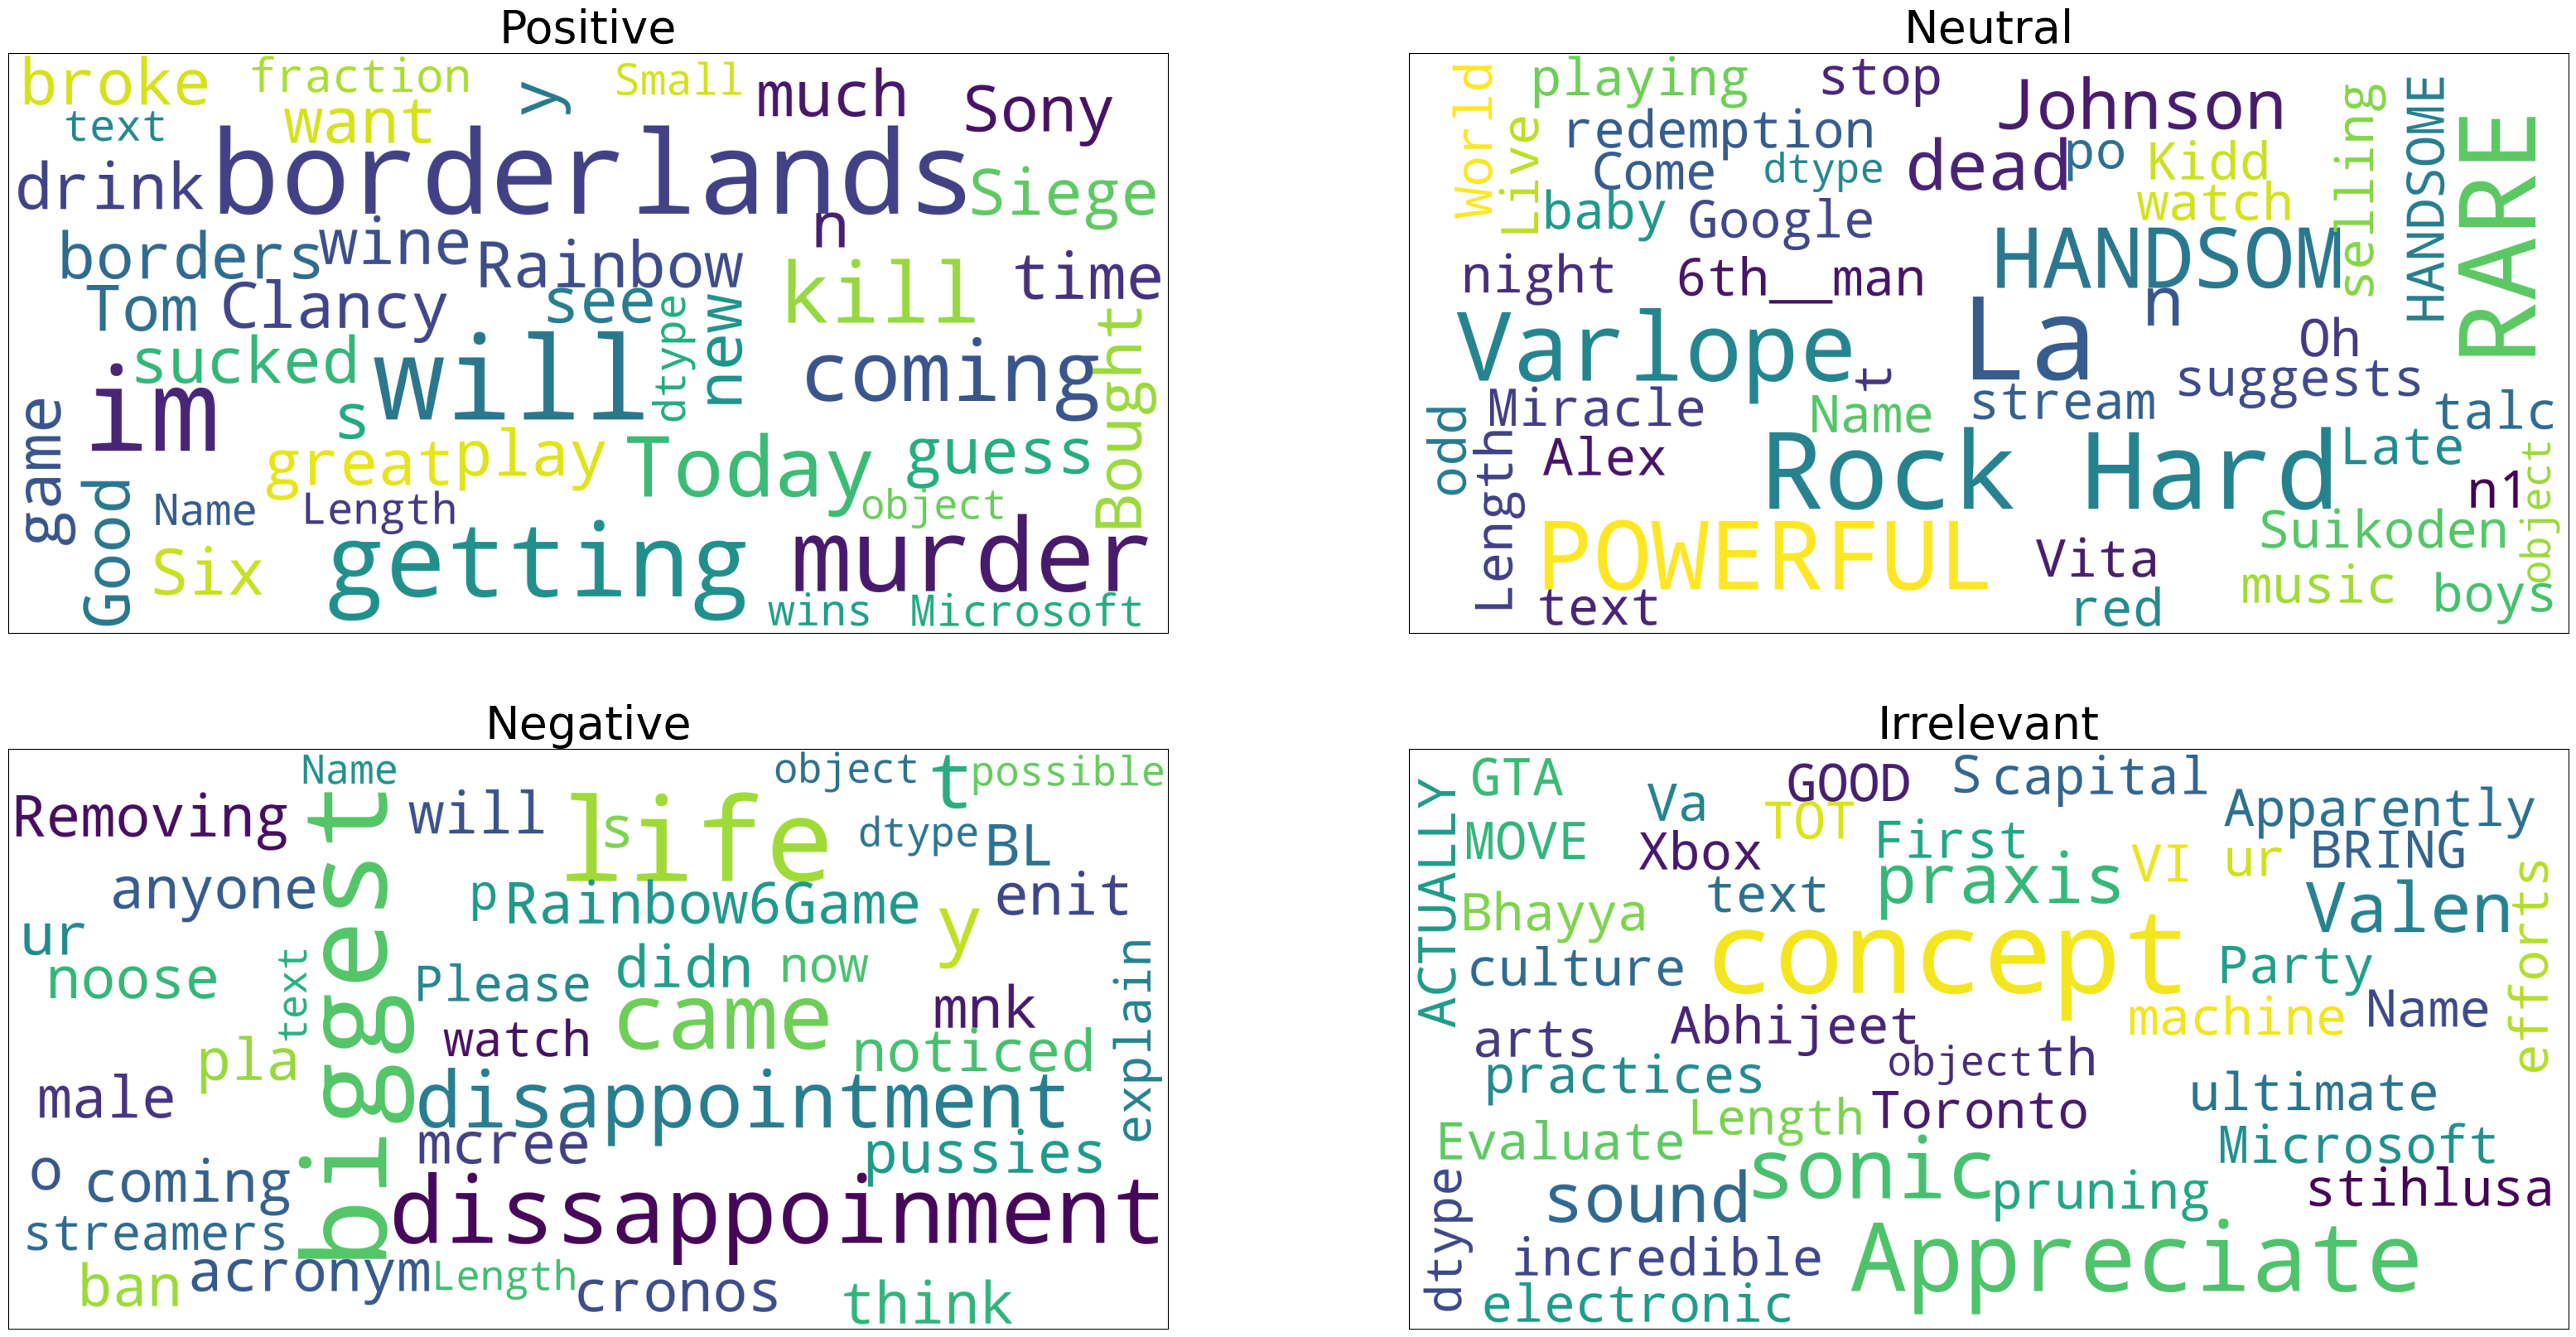

<Figure size 640x480 with 0 Axes>

In [18]:
# wordcloud visualization
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

plt.figure(figsize=(40,20))

for index, col in enumerate(df['Sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['Sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [19]:
for index, col in enumerate(df['Sentiment'].unique()):
    print(index,col)

0 Positive
1 Neutral
2 Negative
3 Irrelevant


In [20]:
# data cleaning
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [21]:
df[df["Sentiment"]=='Irrelevant']['text'][101]

'appreciate the sonic concepts praxis valenzuela and landaposas thread together in this talk multimodal listening soundwalks borderlands frameworks participatory action research and testimonios so many thoughtful and resonant intersections here'

In [22]:
df['text'][78]

'one of our own profzeroo is live w borderlands 3 catch him here buffly 2wmmip5 say streamer shouts in chat for a chance to be in an upcoming one streamer _ shouts shout out'

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['Sentiment'],test_size=0.2,random_state=42)

In [24]:
x_train.shape

(58305,)

In [25]:
x_test.shape

(14577,)

In [26]:
y_train.shape

(58305,)

In [27]:
y_test.shape

(14577,)

In [28]:
# model building and testing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_jobs=-1))])
clf.fit(x_train,y_train)

# # evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))

0.9245386567880908


In [29]:
clf.predict(['I hate to dance and eat'])

array(['Negative'], dtype=object)

In [30]:
clf.predict(['I love to dance and eat'])

array(['Positive'], dtype=object)

In [31]:
clf.predict(['appreciate the sonic concepts praxis valenzuela and landaposas thread together in this talk multimodal listening soundwalks borderlands frameworks participatory action research and testimonios so many thoughtful and resonant intersections here'])

array(['Irrelevant'], dtype=object)

In [32]:
import pickle
pickle.dump(clf,open('analysis.pkl','wb'))

# import pickle
# import streamlit as st





# est = pickle.load(open('tsanalysis.pkl', 'rb'))
# st.title("Twitter sentiment analysis")

# tweet=st.text_input("Enter your tweet here")
# submit=st.button('Predict')
# if submit:
#     prediction='abhi batate h'
#     st.text_area(prediction)